In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec

## Load data

In [2]:
X_train = np.load('./dataset-n20-X-train.npy')
X_valid = np.load('./dataset-n20-X-validate.npy')
y_train = np.load('./dataset-n20-y-train.npy')
y_valid = np.load('./dataset-n20-y-validate.npy')

## Helper functions

In [79]:
class_colors = ['green', 'blue', 'orange', 'red', 'grey', 'black']

def color_bars(bars):
    for bar, color in zip(bars, class_colors):
        bar.set_color(color)

def annotate_height_value_of_bars(bars, ax, format_type):
    if format_type not in ['int', 'float']:
        raise ValueError('Expected format_type is \'int\' or \'float\', but {} given.'.format(format_type))
    for bar in bars:
        height = bar.get_height()
        if format_type == 'int':
            ax.text(bar.get_x()+bar.get_width()/2., height, '{:.1e}'.format(float(height)), ha='center', va='bottom')
        else: # format_type == 'float'
            ax.text(bar.get_x()+bar.get_width()/2., height, '{:.4}'.format(height), ha='center', va='bottom')
            
def show_classes_statistics(labels, y_data):
    print('Total number of data: {}'.format(int(np.sum(y_data))))
    
    for yi, label in zip(y_data, labels):
        print('Number of {}: {}'.format(label, int(yi)))

def plot_classes_statistics(labels, values, dataset_type):
    fig = plt.figure(figsize=(15, 5))
    gs = gridspec.GridSpec(1, 3, width_ratios=[1, 1, 1])
    
    # Plot total number of classes - bar plot.
    ax_0 = plt.subplot(gs[0])
    bars_1 = plt.bar(labels, values, width=0.8)
    annotate_height_value_of_bars(bars_1, ax_0, 'int')
    color_bars(bars_1)
    ax_0.set_title(dataset_type + '- total number')
    
    # Plot relative to maximum number of classes - bar plot.
    ax_1 = plt.subplot(gs[1])
    max_value = np.max(values)
    values_relative = [yi / max_value for yi in values]
    bars_2 = plt.bar(labels, values_relative)
    annotate_height_value_of_bars(bars_2, ax_1, 'float')
    color_bars(bars_2)
    ax_1.set_title(dataset_type + '- relative to maximal number')
    
    # Plot relative number of classes - bar plot.
    ax_1 = plt.subplot(gs[2])
    explode = [0.08] * 6
    plt.pie(values, labels=labels, colors=class_colors, autopct='%1.1f%%', shadow=True, startangle=0, explode=explode)
    ax_1.set_title(dataset_type + '- relative number')
    
def dataset_classes_summary(y_data, dataset_type):
    num_A = np.sum(y_data[:, 0])
    num_C = np.sum(y_data[:, 1])
    num_G = np.sum(y_data[:, 2])
    num_T = np.sum(y_data[:, 3])
    num_I = np.sum(y_data[:, 4])
    num_D = np.sum(y_data[:, 5])
    
    x_values = ['A', 'C', 'G', 'T', 'I', 'D']
    y_values = [num_A, num_C, num_G, num_T, num_I, num_D]
    
    show_classes_statistics(x_values, y_values)
    plot_classes_statistics(x_values, y_values, dataset_type)
    

## Train dataset exploring

Total number of data: 27981693
Number of A: 3592582
Number of C: 3880343
Number of G: 3877680
Number of T: 3591728
Number of I: 12981599
Number of D: 57761


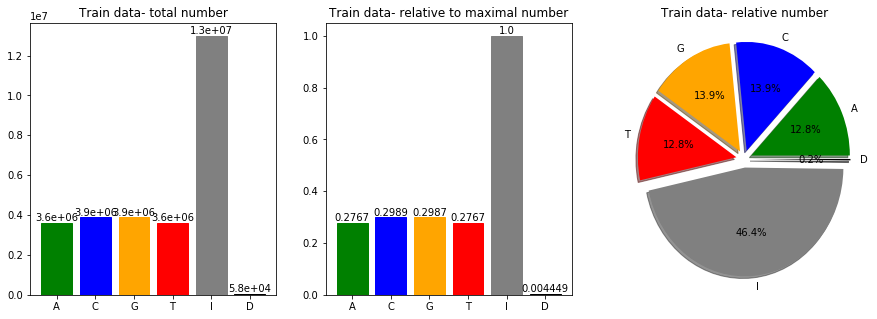

In [80]:
dataset_classes_summary(y_train, 'Train data')

## Valid dataset exploring

Total number of data: 3109078
Number of A: 398946
Number of C: 432188
Number of G: 430550
Number of T: 399191
Number of I: 1441667
Number of D: 6536


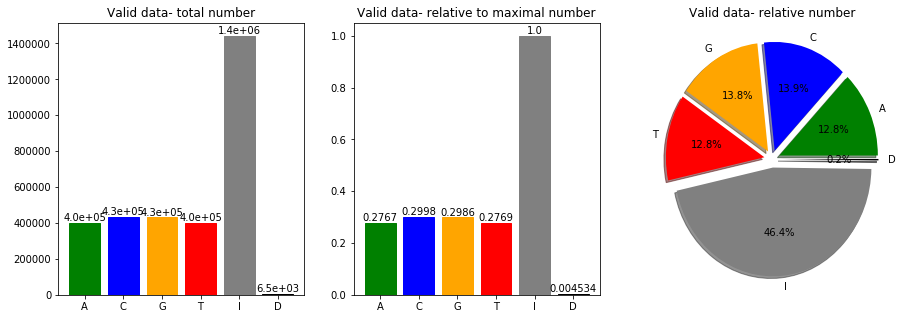

In [78]:
dataset_classes_summary(y_valid, 'Valid data')